In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
#img = image.load_img("C:/Users/Vibha/OneDrive/Desktop/Computervision/basedata/train/healthy/1.jfif")
img=image.load_img("D:/Computervision/basedata/train/healthy/1.png")

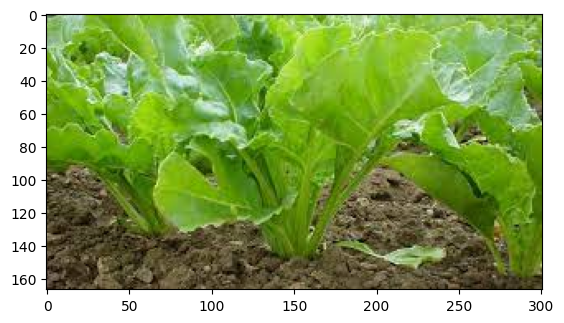

In [3]:
plt.imshow(img)

In [4]:
#cv2.imread("C:/Users/Vibha/OneDrive/Desktop/Computervision/basedata/train/healthy/1.jfif")
cv2.imread("D:/Computervision/basedata/train/healthy/1.png")

array([[[ 88, 110,  86],
        [ 59,  83,  59],
        [ 53,  82,  57],
        ...,
        [ 77, 172, 128],
        [ 82, 172, 129],
        [ 86, 170, 128]],

       [[ 90, 116,  92],
        [ 71, 100,  74],
        [ 56,  88,  63],
        ...,
        [ 72, 169, 125],
        [ 72, 167, 123],
        [ 73, 163, 120]],

       [[106, 144, 116],
        [106, 144, 114],
        [ 97, 138, 110],
        ...,
        [ 77, 180, 135],
        [ 83, 186, 141],
        [ 85, 186, 141]],

       ...,

       [[ 78,  91, 105],
        [ 55,  68,  82],
        [ 36,  49,  63],
        ...,
        [ 42,  70,  77],
        [ 45,  73,  80],
        [ 45,  73,  80]],

       [[ 64,  77,  91],
        [ 65,  78,  92],
        [ 58,  71,  85],
        ...,
        [ 60,  88,  95],
        [ 55,  83,  90],
        [ 41,  69,  76]],

       [[ 19,  32,  46],
        [ 22,  35,  49],
        [ 18,  31,  45],
        ...,
        [ 62,  91,  96],
        [ 62,  91,  96],
        [ 54,  83,  88]]

In [5]:
train = ImageDataGenerator(rescale= 1/186)
validation = ImageDataGenerator(rescale= 1/186)

In [6]:
train_dataset = train.flow_from_directory('D:/Computervision/basedata/train/',
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode ='binary')

validation_dataset = validation.flow_from_directory('D:/Computervision/basedata/validation/',
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode ='binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
train_dataset.class_indices
#train_dataset.classes


{'diseased': 0, 'healthy': 1}

In [8]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(200,200,3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                   
                                   ])

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [13]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 2s 618ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 1s 429ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 1s 421ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 419ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 484ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 498ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 433ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

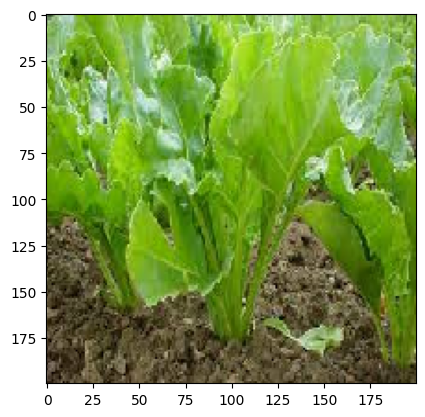

1/1 [==============================] - 0s 63ms/step
Healthy


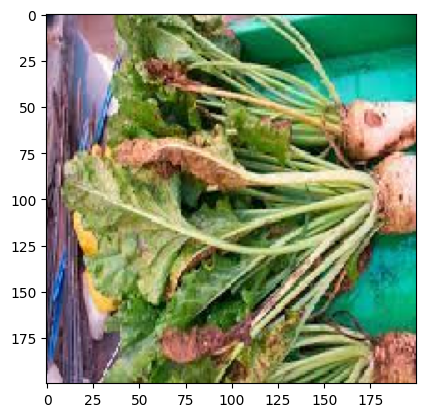

1/1 [==============================] - 0s 63ms/step
Diseased


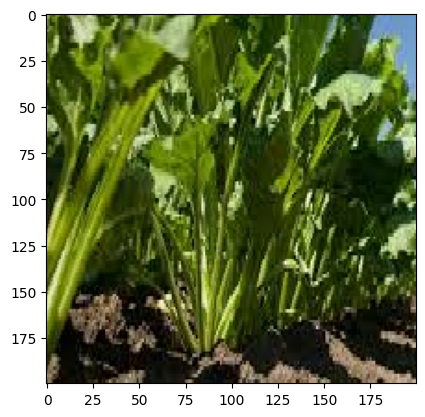

1/1 [==============================] - 0s 62ms/step
Healthy


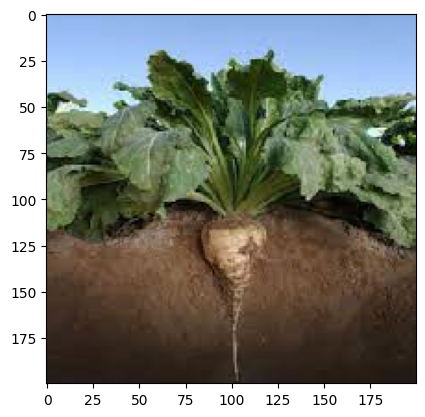

1/1 [==============================] - 0s 63ms/step
Healthy


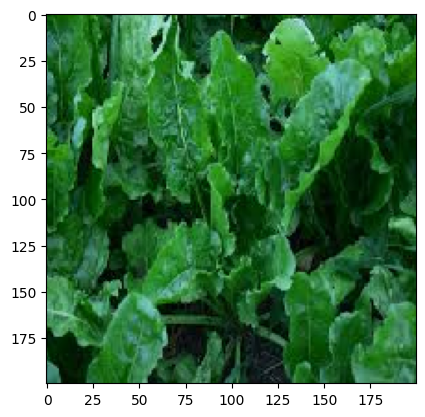

1/1 [==============================] - 0s 63ms/step
Healthy


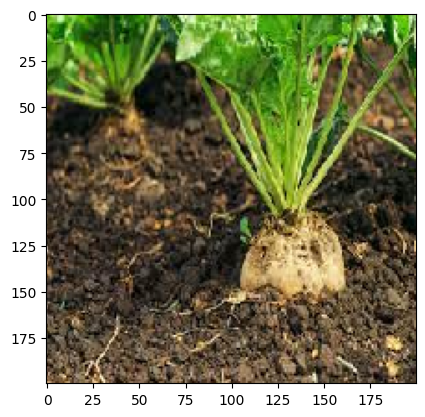

1/1 [==============================] - 0s 62ms/step
Healthy


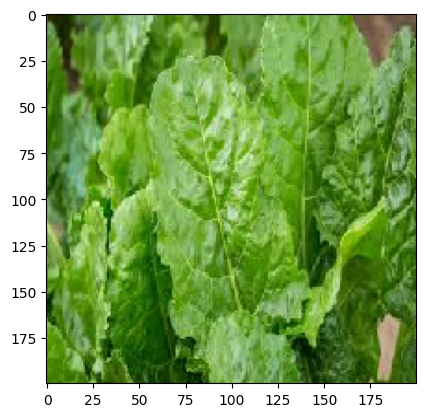

1/1 [==============================] - 0s 63ms/step
Diseased


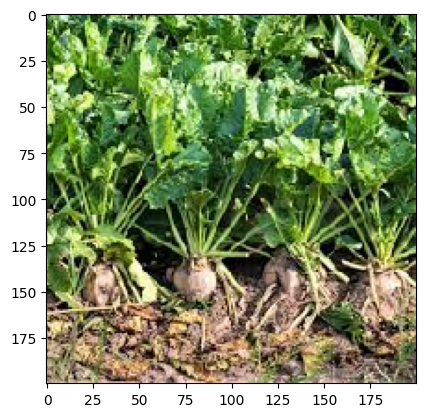

1/1 [==============================] - 0s 71ms/step
Healthy


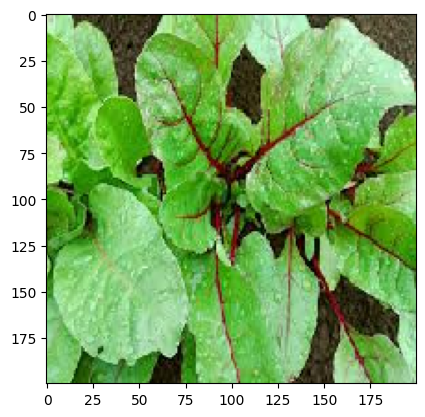

1/1 [==============================] - 0s 75ms/step
Healthy


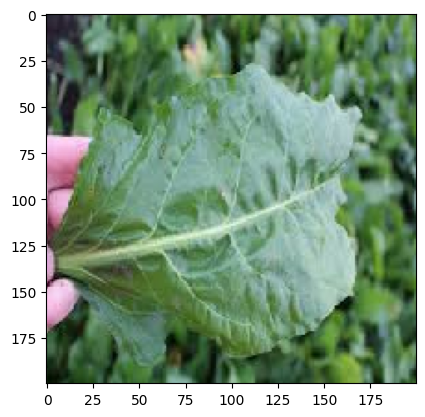

1/1 [==============================] - 0s 61ms/step
Diseased


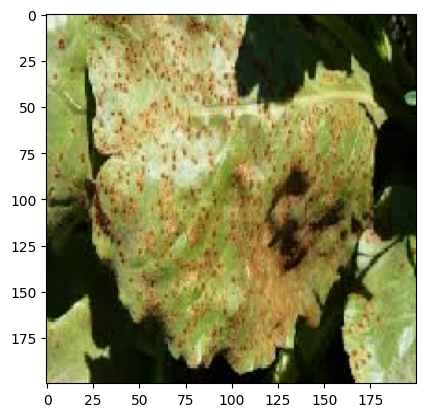

1/1 [==============================] - 0s 63ms/step
Diseased


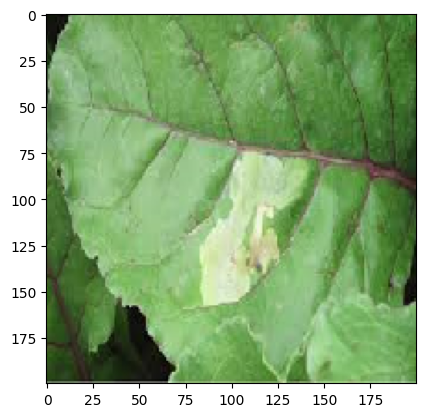

1/1 [==============================] - 0s 83ms/step
Diseased


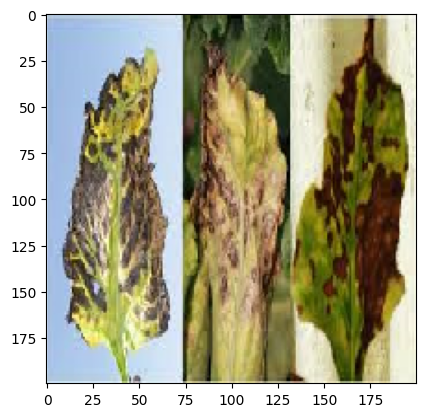

1/1 [==============================] - 0s 64ms/step
Diseased


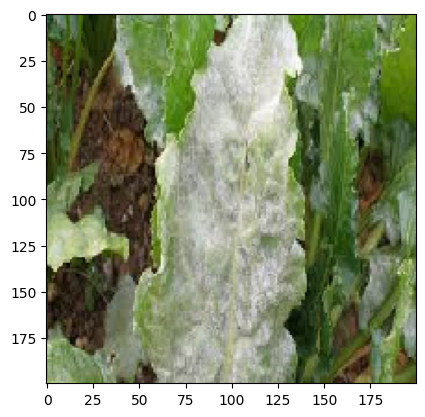

1/1 [==============================] - 0s 47ms/step
Diseased


In [12]:
dir_path ='D:/Computervision/basedata/test'

for i in os.listdir(dir_path):
    #print(i)
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    #Convert images to array
    X= image.img_to_array(img)
    X= np.expand_dims(X,axis=0)
    images= np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Diseased")
   # elif val == 1:
     #   print("Healthy")
    else:
        print("Healthy")